In [150]:
import numpy as np
import matplotlib.pyplot as plt
import sys

rec = 15000
sys.setrecursionlimit(rec)

In [106]:
def f1(x, eps):
    return x / 100 - np.sin(x) / x

In [183]:
def f2(x, eps):
    if x!= 0:
        return np.sqrt(1 + eps - (np.sin(x) / x))
    else:
        return np.sqrt(eps)

In [170]:
def algo(func, L, massiv, eps, counter):
    new_x = min(massiv , key = lambda f: f[1])
    massiv.remove(new_x)
    x, y = new_x[0], new_x[1]
    if (func(x, eps) - y) < pointstop:
        return func(x, eps), counter
    delta = (1 / (2 * L)) * (func(x, eps) - y)
    x_1 = x - delta
    x_2 = x + delta
    y_new = (func(x, eps) + y) / 2
    massiv.append((x_1, y_new)), massiv.append((x_2, y_new))
    counter += 1
    #print(func(x, eps))
    return algo(func, L, massiv, eps, counter)






In [171]:
a = -10
b = 10
L = 10
pointstop = 0.01
eps = 0
func = f1

Cначала рассмотрим функцию f1: будем изменять у нее L(с каким-то разумным критерием остановки) и будем глядеть, как от этого изменится минимум.

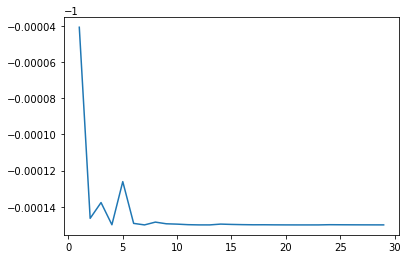

In [172]:
Larray = np.arange(1, 30)
answer = []
counters = []
for L in Larray:
    massiv = []
    counter = 0
    x_1 = (a + b) / 2 + (func(a, eps) - func(b, eps)) / (2 * L)
    y_1 = (func(a, eps) + func(b, eps)) / 2 + ((a - b) / 2 ) * L
    massiv.append((x_1, y_1))
    result = algo(func, L, massiv, eps, counter)
    answer.append(result[0])
    counters.append(result[1])
plt.plot(Larray, answer)

Как видно по графику, в целом L не сильно влияет на значение минимума, однако эмпирически я заметил, что с большим L программа считается дольше. Построим график зависимости количества шагов алгоритма от L.

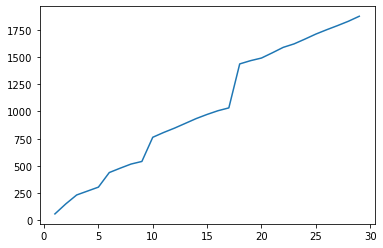

In [138]:
plt.plot(Larray, counters)

Видим линейный рост количества шагов алгоритма от L

Теперь перейдем к функции f2, у нее есть параметр eps, попытаемся поиграться с eps и L.

In [188]:
eps = 1
func = f2
L = 0.5
pointstop = 0.01

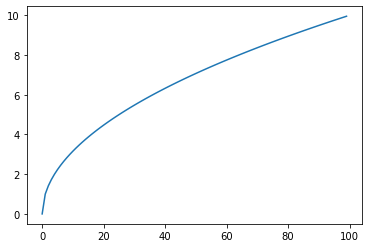

In [192]:
epsilons = np.arange(0, 100)
answer = []
counters = []
for eps in epsilons:
    massiv = []
    counter = 0
    x_1 = (a + b) / 2 + (func(a, eps) - func(b, eps)) / (2 * L)
    y_1 = (func(a, eps) + func(b, eps)) / 2 + ((a - b) / 2 ) * L
    massiv.append((x_1, y_1))
    result = algo(func, L, massiv, eps, counter)
    answer.append(result[0])
    counters.append(result[1])
plt.plot(epsilons, answer)

Как мы видим, для eps которые не нарушают положительность подкоренного выражения все считается отлично, значит мы можем зафиксировать какой-то один eps и попробовать поиграть с L.

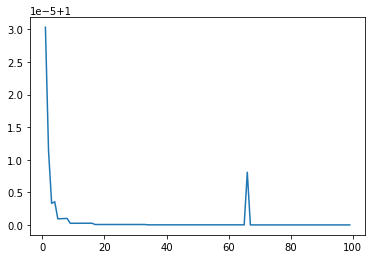

In [196]:
eps = 1
Larray = np.arange(1, 100)
answer = []
counters = []
for L in Larray:
    massiv = []
    counter = 0
    x_1 = (a + b) / 2 + (func(a, eps) - func(b, eps)) / (2 * L)
    y_1 = (func(a, eps) + func(b, eps)) / 2 + ((a - b) / 2 ) * L
    massiv.append((x_1, y_1))
    result = algo(func, L, massiv, eps, counter)
    answer.append(result[0])
    counters.append(result[1])
plt.plot(Larray, answer)

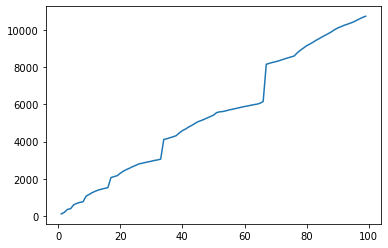

In [197]:
plt.plot(Larray, counters)

Наблюдаем независимось результата от L, при этом наблюдается линейный рост числа итераций алгоритма в зависимости от L.